# NYPD Stop-and-Frisk

___
Team Member Names here:

- Name 1: Mahmoud Badi 
- Name 2: Aman Singh 
- Name 3: Rahul Khandalkar 
___

#### Goal and Business Case

This is part of a class project taught by Dr. Eric Larson (Machine Learning in Python) at the Computer Science department at SMU. Here, we analyze NYPD's stop-and-frisk dataset and then implement different Machine Learning algorithms to predict arrests. 

In our dataset (2012), New Yorkers were stopped by the police 532,911 times:

* 473,644 were totally innocent (89 percent).
* 284,229 were black (55 percent).
* 165,140 were Latino (32 percent).
* 50,366 were white (10 percent). 

In order to understand the information captured in the csv file, we took a look at the specs document that helps us identify the various features recorded in our dataset.

Our goal is to build a classification algorithm that can predict arrests efficiently so that they can be implemented on other states or other country's law enforcement databases. This will not only help reduce the number of inmates in prisons and save tax payer's money but also decrease the public frustration rate/anger and improve's the law enforcement's credibility.

We found that people of African or Hispanic descent were stopped more frequently than whites. This is due to the fact that humans make decisions based on their own experiences with people from different races, ages, shapes, and other characterisitics. We've also tried to find a correlation between the arrests made, age, and race.

Using a strong classification algorithm will allow a law enforcement agency to negate the possibility of making mistakes, give them a second non-judgemental point of view, and reduce the unprofessionalism of police by a high extent.

In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv('2012.csv')

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (73,103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Exploratory Data Analysis (EDA)

Our Dataset came with 112 features. We performed preprocessing and exploratory data analysis (EDA) on the features that are important and came up with results that backup the claims of police being unprofessional and biased in their judgments and arrests. That was the first phase of our project. In the second phase of the project, we chose the algorithms that we will
be working with and performed classification and performance evaluation of each algorithm used.

We shortlisted and included the following features in our dataframe:

* **timestop**: TIME OF STOP (HH:MM)
* **inout**: WAS STOP INSIDE OR OUTSIDE ?
* **perstop**: PERIOD OF STOP (MMM)
* **arstmade**: WAS AN ARREST MADE ?
* **frisked**: WAS SUSPECT FRISKED ?
* **searched**: WAS SUSPECT SEARCHED ?
* **contrabin**: WAS CONTRABAND FOUND ON SUSPECT ?
* **pistol**: WAS A PISTOL FOUND ON SUSPECT ?
* **race**: SUSPECT'S RACE
* **sex**: SUSPECT'S SEX
* **age**: SUSPECT'S AGE (converted to age_range as adult and senior)

We've converted all Y and N values to 1s and 0s.

We also performed one-hot encoding on *sex* and *race*.

The following features had outliers which were removed from the dataset completely:
* **timestop**: Null values
* **perstop**: Null values
* **age**: arrests were made on < 8 years and > 89 years  

In [ ]:
#Experimenting with the various features.
#import pandas as pd
#df2=pd.read_csv('2012.csv', names=['timestop','inout', 'perobs', 'perstop','frisked', 'searched', 'contraban', 'pistol', 'sex','race','age', 'arstmade'])

In [2]:
df.head()

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,...,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
0,2012,115,6443,6162012,1630,1,O,P,1,GLA,...,,115,A,,,1020403,215182,CM,1,1
1,2012,40,14369,8252012,130,1,O,H,1,MISD,...,,40,D,7,,1009898,236541,CM,0,1
2,2012,88,3205,5282012,1200,A,O,P,3,CHILD NEGLECT,...,,88,F,,,993035,189026,CM,1,1
3,2012,81,3310,3092012,1315,1,O,P,2,ASSAULT,...,,81,E,5,,1005291,190673,CM,1,1
4,2012,73,1973,1272012,1015,1,O,P,1,FEL,...,,73,J,*,,1008895,181134,CM,1,1


The following is the dataframe(df2) that contains the features that we're going to work with:

In [3]:
df2=df[['timestop','inout', 'perstop','frisked', 'searched', 'contrabn', 'pistol', 'sex','race','age', 'arstmade']]
df2.head()

,timestop,inout,perstop,frisked,searched,contrabn,pistol,sex,race,age,arstmade
0,1630,O,7,N,N,N,N,M,B,32,N
1,130,O,5,Y,N,N,N,F,Q,31,Y
2,1200,O,3,N,N,N,N,F,B,31,N
3,1315,O,15,N,N,N,N,M,B,29,N
4,1015,O,5,N,N,N,N,M,B,26,N


In [4]:
print(df2.info())
df2['perstop'] = df2['perstop'].convert_objects(convert_numeric=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529477 entries, 0 to 529476
Data columns (total 11 columns):
timestop    529477 non-null int64
inout       529477 non-null object
perstop     529477 non-null int64
frisked     529477 non-null object
searched    529477 non-null object
contrabn    529477 non-null object
pistol      529477 non-null object
sex         529477 non-null object
race        529477 non-null object
age         529477 non-null int64
arstmade    529477 non-null object
dtypes: int64(3), object(8)
memory usage: 44.4+ MB
None


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [5]:
df2.apply(lambda x: pd.to_numeric(x, errors='ignore'))
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529477 entries, 0 to 529476
Data columns (total 11 columns):
timestop    529477 non-null int64
inout       529477 non-null object
perstop     529477 non-null int64
frisked     529477 non-null object
searched    529477 non-null object
contrabn    529477 non-null object
pistol      529477 non-null object
sex         529477 non-null object
race        529477 non-null object
age         529477 non-null int64
arstmade    529477 non-null object
dtypes: int64(3), object(8)
memory usage: 44.4+ MB
None


In the following dataframe(df3) we're converting the 'Yes' and 'No' to '1' and '0' in our classification:

In [6]:
#import numpy as np
#pd.DataFrame(np.where(df2=='Y', 1, 0), columns=df2.columns, index=df2.index)
df3=df2.replace(['Y', 'N'], [1, 0])
df3.head()

,timestop,inout,perstop,frisked,searched,contrabn,pistol,sex,race,age,arstmade
0,1630,O,7,0,0,0,0,M,B,32,0
1,130,O,5,1,0,0,0,F,Q,31,1
2,1200,O,3,0,0,0,0,F,B,31,0
3,1315,O,15,0,0,0,0,M,B,29,0
4,1015,O,5,0,0,0,0,M,B,26,0


In [7]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529477 entries, 0 to 529476
Data columns (total 11 columns):
timestop    529477 non-null int64
inout       529477 non-null object
perstop     529477 non-null int64
frisked     529477 non-null int64
searched    529477 non-null int64
contrabn    529477 non-null int64
pistol      529477 non-null int64
sex         529477 non-null object
race        529477 non-null object
age         529477 non-null int64
arstmade    529477 non-null int64
dtypes: int64(8), object(3)
memory usage: 44.4+ MB


Checking if the outlier(age >88) has been removed or not:

In [8]:
print(df3.age.max())

88


Age has been categorized into adult and senior:

In [9]:
df3['age_range'] = pd.cut(df3.age,[0,60,1e6],3,labels=['adult','senior']) 
df3.age_range.describe()

count     529477
unique         2
top        adult
freq      522988
Name: age_range, dtype: object

In [10]:
df3_grouped = df3.groupby(by=['race','age_range'])
print (df3_grouped.describe())

                                age       arstmade       contrabn  \
race age_range                                                      
A    adult     count   16716.000000   16716.000000   16716.000000   
               mean       27.296722       0.072146       0.019622   
               std        10.917410       0.258738       0.138701   
               min        13.000000       0.000000       0.000000   
               25%        19.000000       0.000000       0.000000   
               50%        24.000000       0.000000       0.000000   
               75%        33.000000       0.000000       0.000000   
               max        60.000000       1.000000       1.000000   
     senior    count     254.000000     254.000000     254.000000   
               mean       65.791339       0.078740       0.003937   
               std         4.991669       0.269865       0.062746   
               min        61.000000       0.000000       0.000000   
               25%        62.00000

Percentage of arrests within the different groups:

In [12]:
print ("Percentage of arrests within the different groups:")
print (df3_grouped.arstmade.sum() / df3_grouped.arstmade.count() *100)

Percentage of arrests within the different groups:
race  age_range
A     adult        7.214645
      senior       7.874016
B     adult        5.694149
      senior       4.920914
I     adult        5.716878
      senior       5.405405
P     adult        6.607867
      senior       4.733728
Q     adult        6.408487
      senior       5.959184
U     adult        6.316363
      senior       3.921569
W     adult        6.735118
      senior       5.468750
Z     adult        4.551920
      senior       8.904110
Name: arstmade, dtype: float64


In [11]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

Grouping by race and age range:

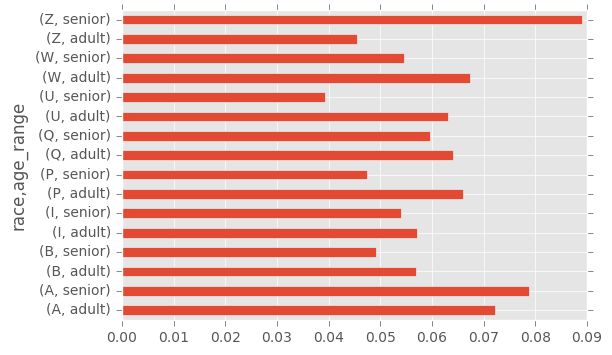

In [12]:
plt.style.use('ggplot')

df3_grouped = df3.groupby(by=['race','age_range'])
arrest_rate = df3_grouped.arstmade.sum() / df3_grouped.arstmade.count()
ax = arrest_rate.plot(kind='barh')

To understand the relation between people who were frisked and searched:

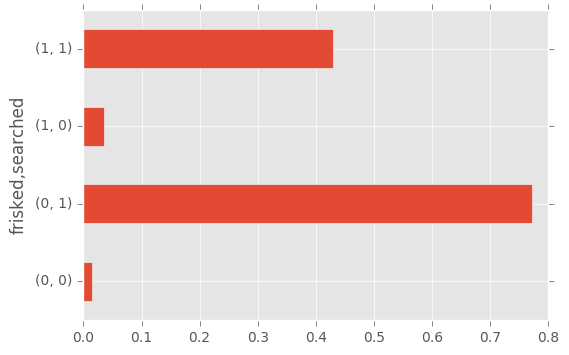

In [13]:
df3_grouped = df3.groupby(by=['frisked','searched'])
arrest_rate = df3_grouped.arstmade.sum() / df3_grouped.arstmade.count()
ax = arrest_rate.plot(kind='barh')

Exploring the relationship between arrests, frisk, and search:

arstmade           False  True 
frisked searched               
0       0         228345   3616
        1            445   1510
1       0         244718   8879
        1          23930  18034


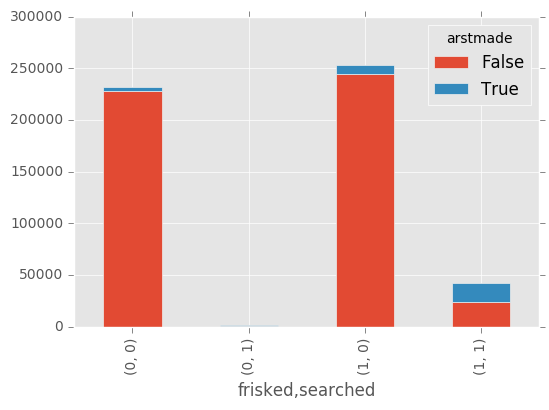

In [14]:
arrest = pd.crosstab([df3['frisked'],df3['searched'] ], 
                       df3.arstmade.astype(bool))
print(arrest)

arrest.plot(kind='bar', stacked=True)

This shows that most of the people who were arrested were frisked and searched, and a number of people who were 'Only' frisked were also arrested. A portion of people were also arrested without being frisked or searched. 

The following is one of the most important plots in our EDA, a crosstabulation between race and frisk:

arstmade       False  True 
race frisked               
A    0          8703    189
     1          7041   1037
B    0        117063   2810
     1        148987  13226
I    0          1165     20
     1           948    108
P    0         14380    315
     1         18873   2031
Q    0         53285   1103
     1         67228   7143
U    0          1782     42
     1          1708    192
W    0         27573    567
     1         19175   2795
Z    0          4839     80
     1          4688    381


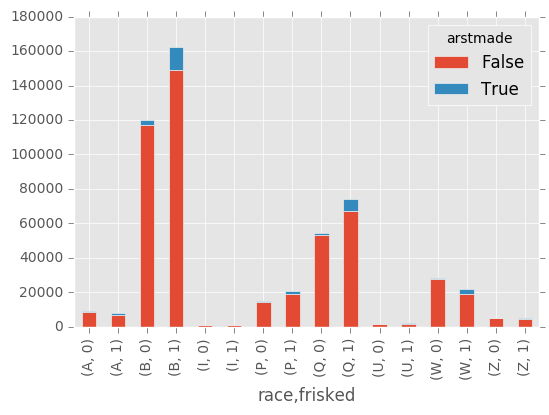

In [15]:
arrest = pd.crosstab([df3['race'],df3['frisked'] ], 
                       df3.arstmade.astype(bool))
print(arrest)

arrest.plot(kind='bar', stacked=True) 

The preceding plot shows that most of the people who were frisked and arrested were of African Origin (B) or White Hispanic (Q).

* A - ASIAN/PACIFIC ISLANDER
* B - BLACK
* I - AMERICAN INDIAN/ALASKAN NATIVE
* P - BLACK-HISPANIC
* Q - WHITE-HISPANIC
* W - WHITE
* U - UNKNOWN
* Z - OTHER

The following code will show that the police had a racial bias in their decisions:

arstmade                False  True 
race frisked searched               
A    0       0           8694    118
             1              9     71
     1       0           6399    314
             1            642    723
B    0       0         116842   1956
             1            221    854
     1       0         136240   4528
             1          12747   8698
I    0       0           1165     16
             1              0      4
     1       0            832     31
             1            116     77
P    0       0          14347    221
             1             33     94
     1       0          17254    702
             1           1619   1329
Q    0       0          53179    787
             1            106    316
     1       0          61216   2328
             1           6012   4815
U    0       0           1778     32
             1              4     10
     1       0           1544     55
             1            164    137
W    0       0          27509    424
 

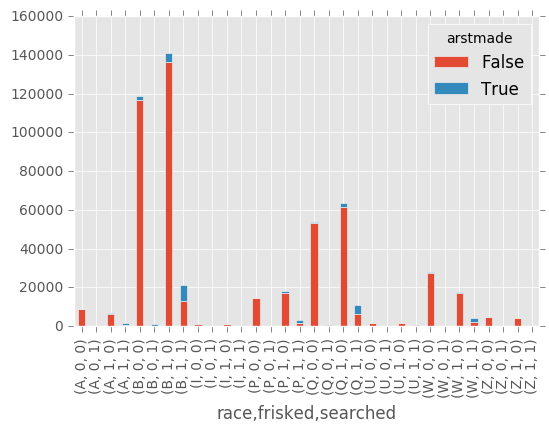

In [16]:
arrest = pd.crosstab([df3['race'],df3['frisked'], df3['searched'] ], 
                       df3.arstmade.astype(bool))
print(arrest)

arrest.plot(kind='bar', stacked=True) 

This plot shows the unfairness in the arrests made by the police. B and Q were searched, frisked, and arrested the most.

In the following code we're plotting the distribution of people in our dataset in terms of their age and race:

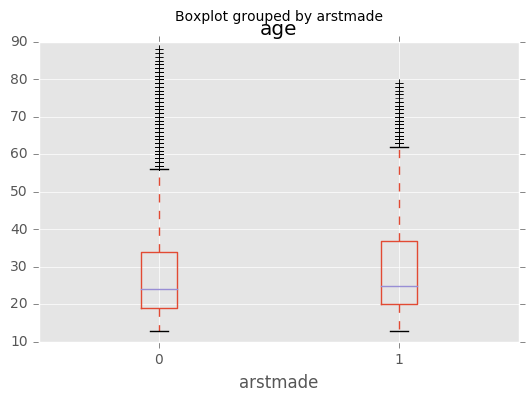

In [17]:
df3.boxplot(column='age', by = 'arstmade')

This plot shows the arrests made in terms of age.

In the following code we're observing the period of stop (B with lower perstop are arrested the most):

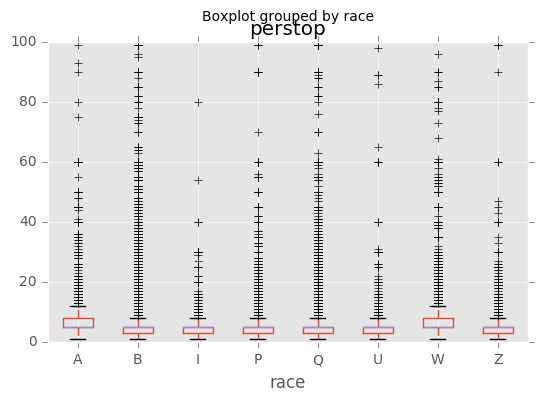

In [18]:
df3.boxplot(column='perstop', by = 'race') 

Now, we're trying to analyze our features using a scattermatrix plot:

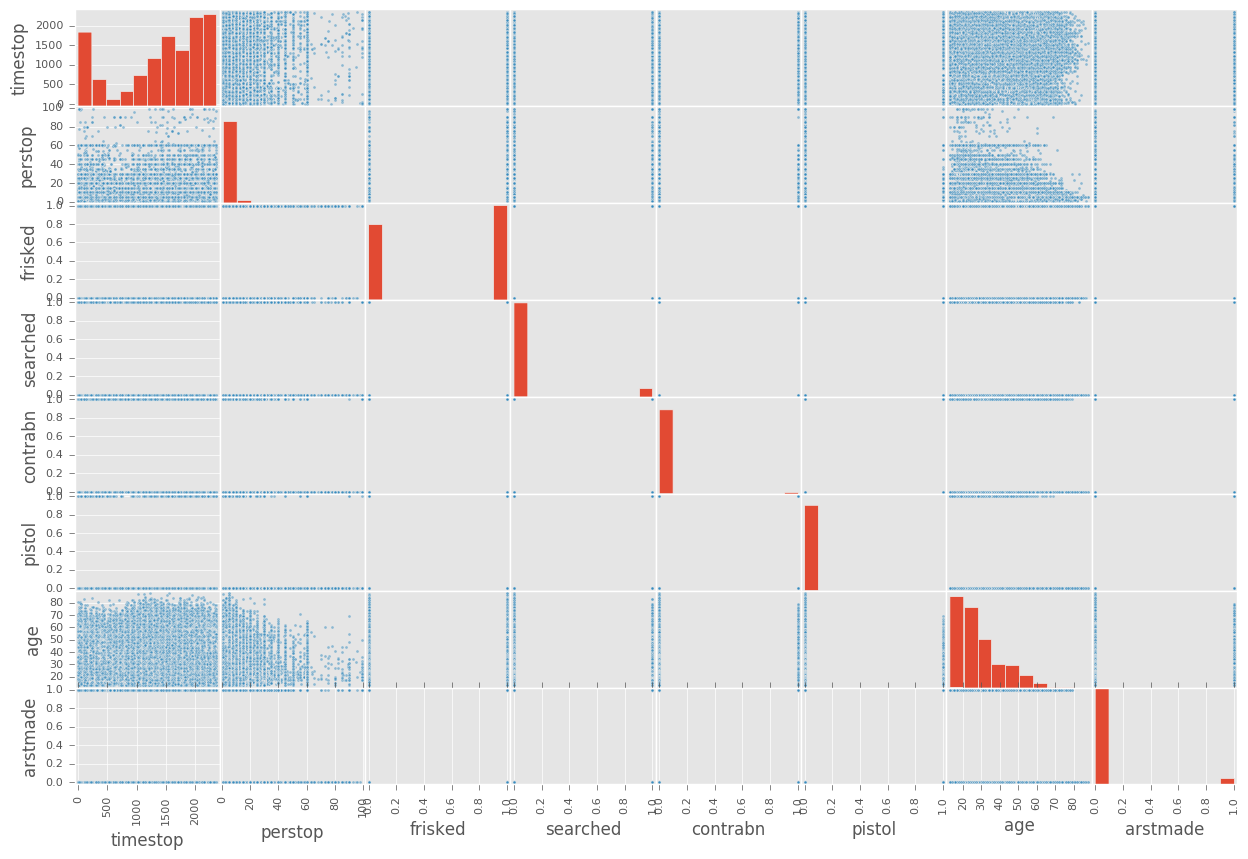

In [19]:
from pandas.tools.plotting import scatter_matrix
ax = scatter_matrix(df3,figsize=(15, 10))

The results shown in the scatter matrix were not clear.

Hence we're using seaborn to analyze the plots better:

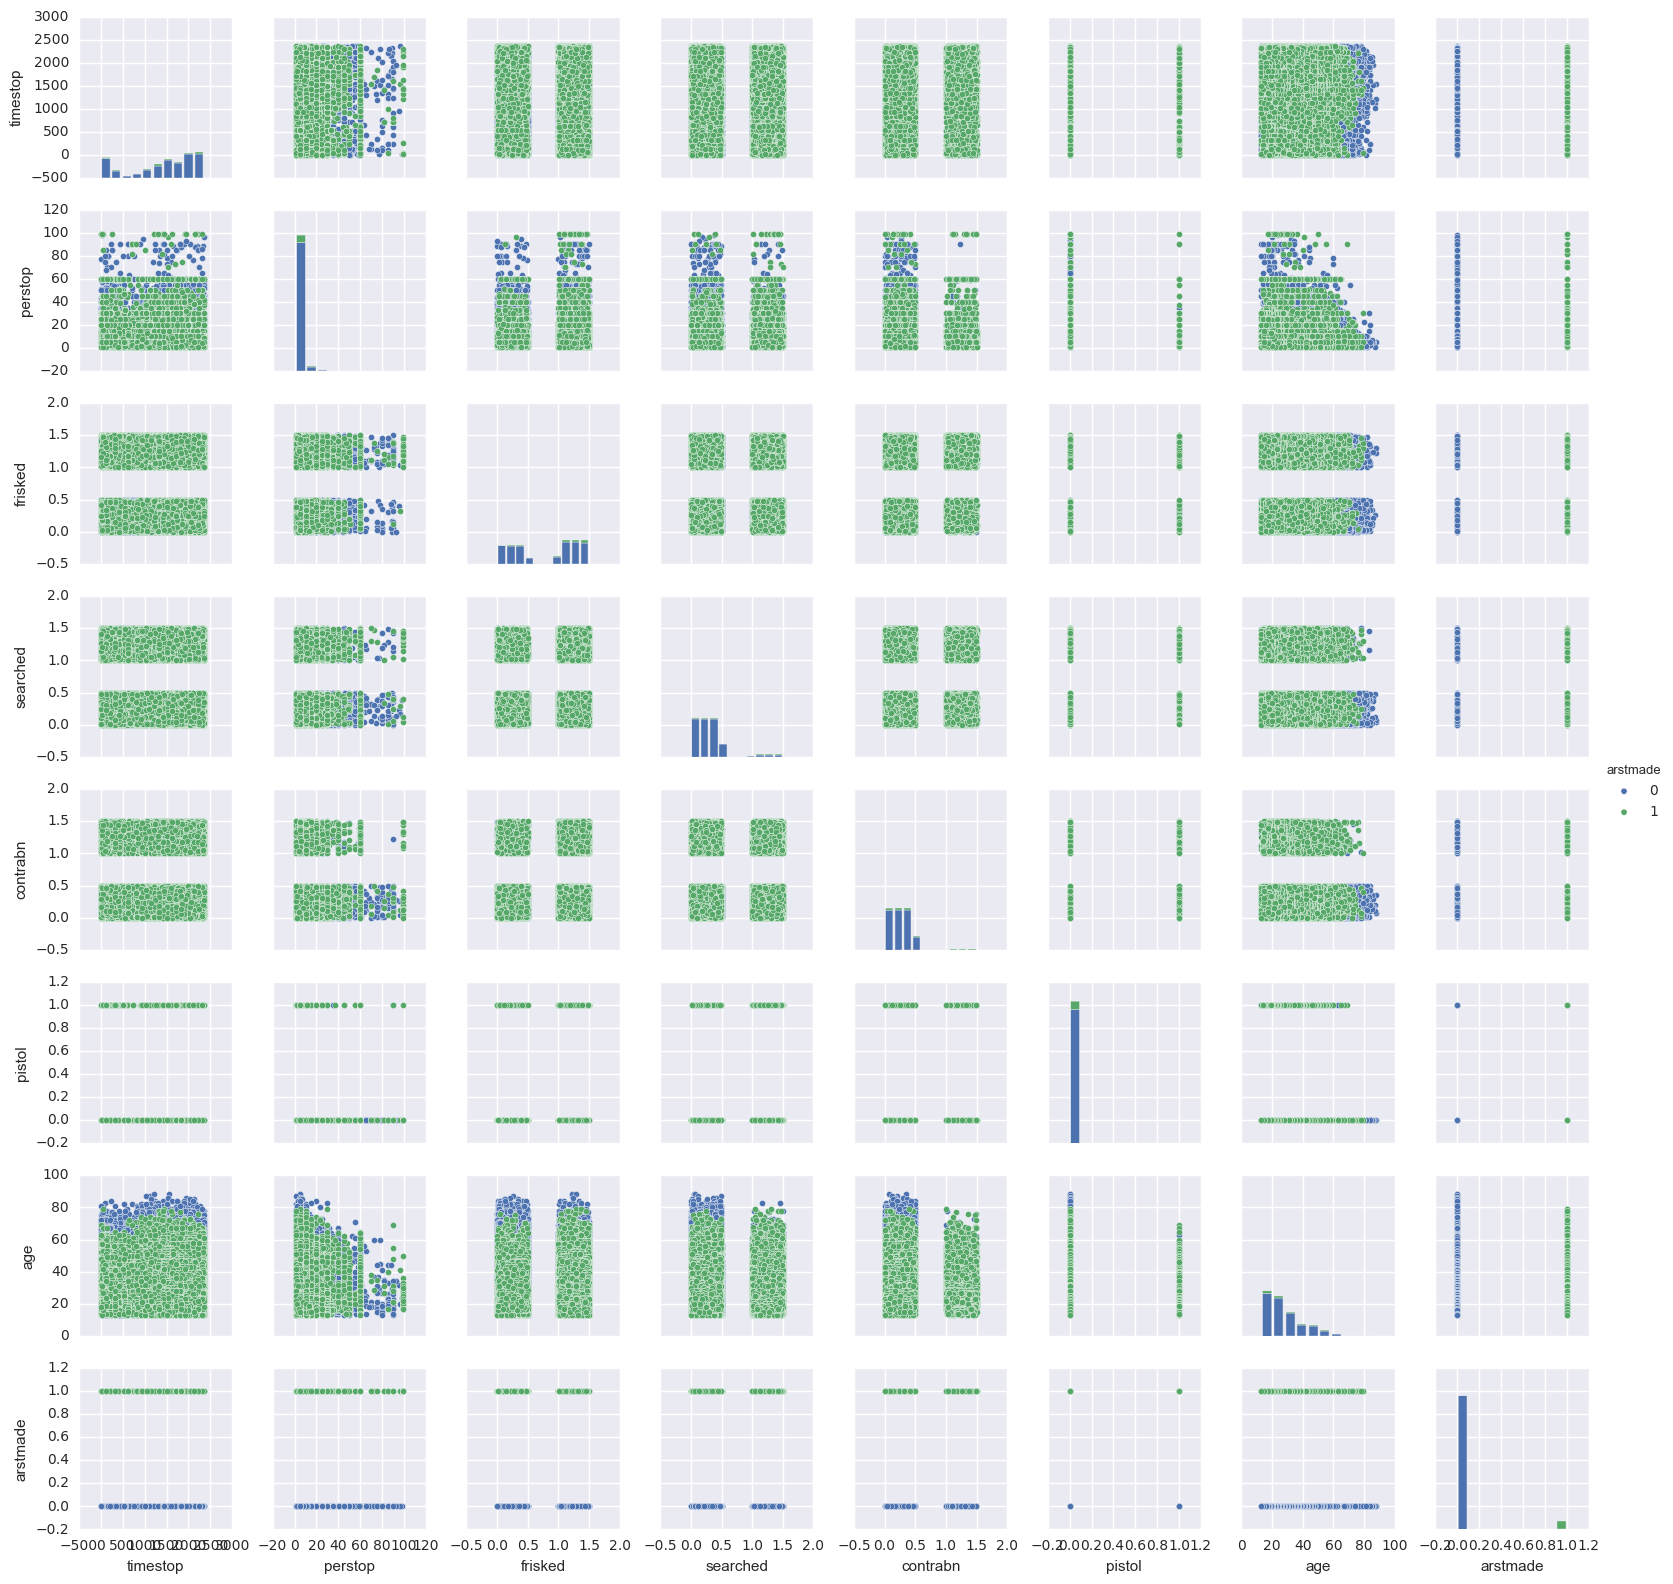

In [20]:
import numpy as np
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True)
df3_jitter = df3.copy()
df3_jitter[['frisked','searched','contrabn']] = df3_jitter[['frisked','searched','contrabn']].values + np.random.rand(len(df3_jitter),3)/2 
sns.pairplot(df3_jitter, hue="arstmade", size=2)

From the plot we can see that people who were found with contraband directly resulted in them getting arrested.

More arrests were made that had a shorter period of stop.

Senior people getting searched resulted in less number of arrests.

The data from the seaborn plot gives us a good look at the various relationships but to get an even clearer relation we use a correlation matrix plot in seaborn:

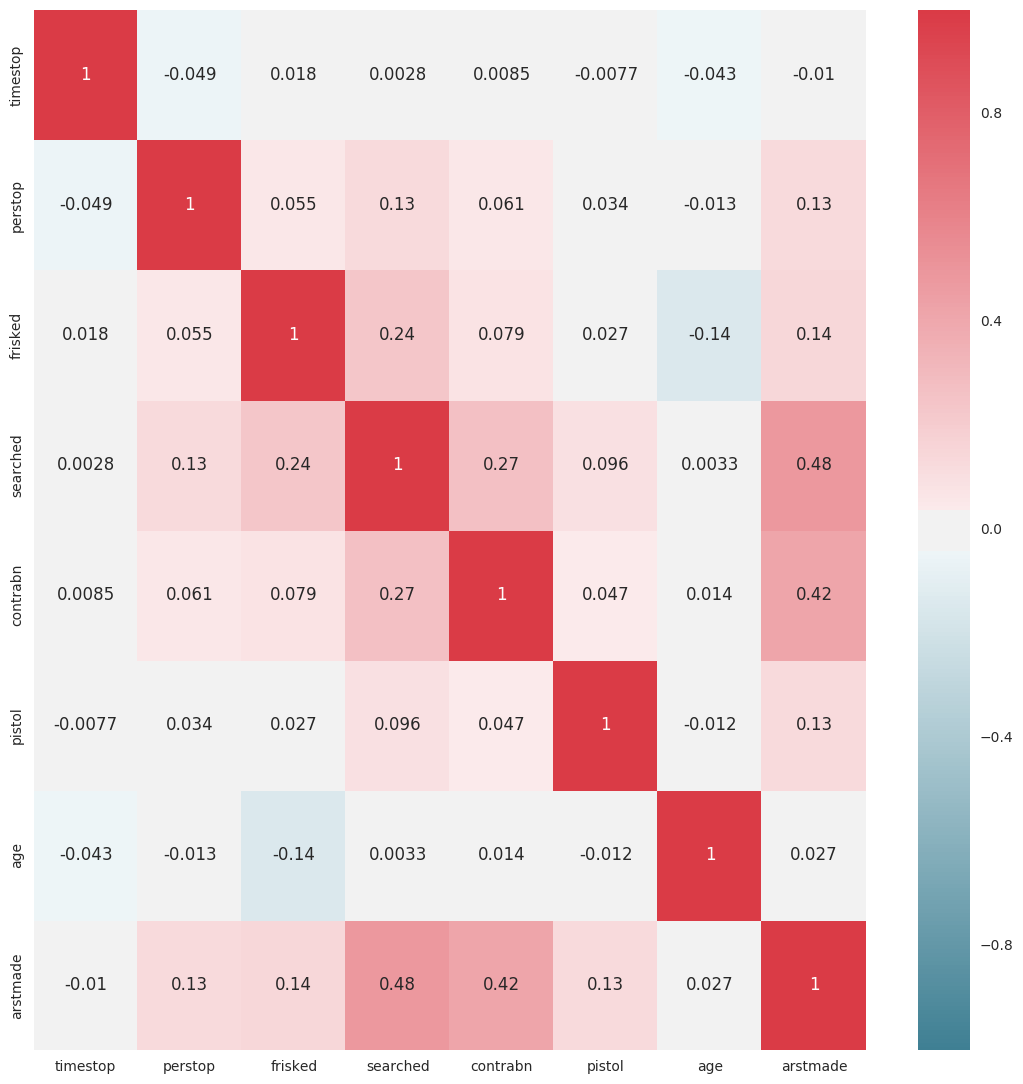

In [21]:
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.set(style="darkgrid") 

f, ax = plt.subplots(figsize=(11, 11))

sns.heatmap(df3.corr(), cmap=cmap, annot=True)

f.tight_layout()

The correlation matrix shows weak correlation between the features. This will be seen again when we try to implement PCA.

The following Violin plot shows relation between race, age, and arrests made:

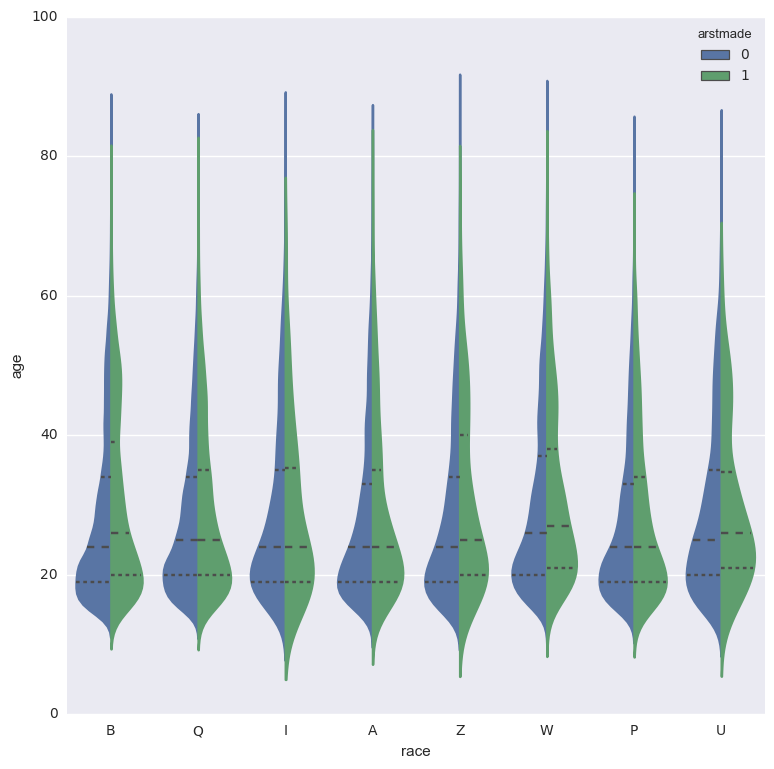

In [22]:
f, ax = plt.subplots(figsize=(9, 9))

sns.violinplot(x="race", y="age", hue="arstmade", data=df3, 
               split=True, inner="quart")

Regardless of the race, most of the arrested people were in the age range of 18 to 30.

The following plot shows a relation between the arrestsmade and the time of the stop:

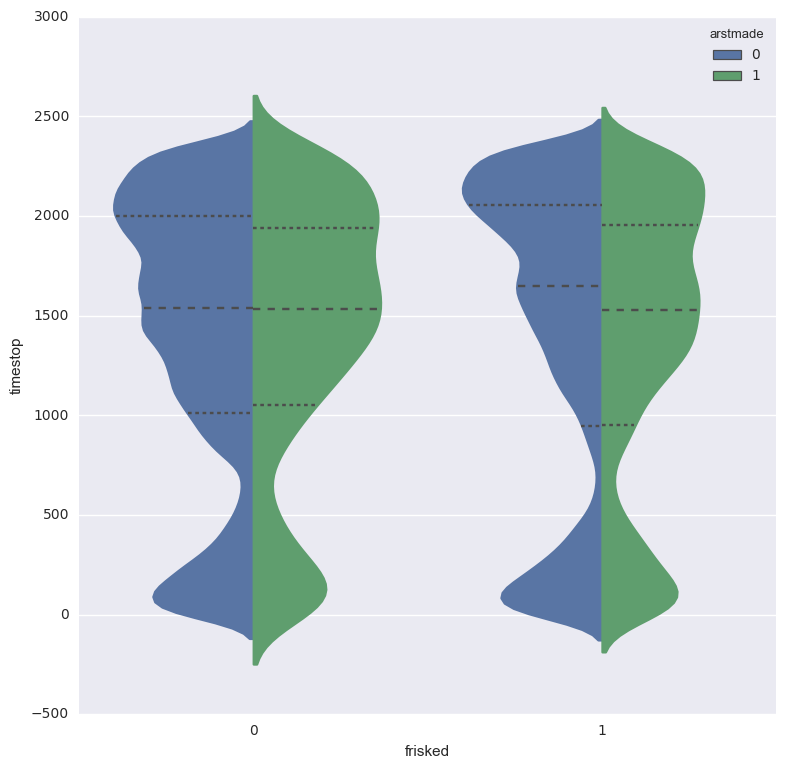

In [23]:
f, ax = plt.subplots(figsize=(9, 9))

sns.violinplot(x="frisked", y="timestop", hue="arstmade", data=df3, 
               split=True, inner="quart")

This plot shows that most of the arrests were made after midnight and evening.

In [24]:
dfpca=df[['perstop', 'perobs', 'age', 'arstmade']]
dfpca=dfpca.replace(['Y', 'N'], [1, 0])
dfpca.head()

,perstop,perobs,age,arstmade
0,7,1,32,0
1,5,1,31,1
2,3,3,31,0
3,15,2,29,0
4,5,1,26,0


In the following code we took a subset of the features(numeric) and now we're implementing PCA:

In [26]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

X=dfpca
y=df3.arstmade
pca = PCA(n_components=4)
X_pca = pca.fit(X).transform(X) # fitting data and transforming it

lda = LDA(n_components=2)
X_lda = lda.fit(X, y).transform(X) # fitting data and transforming it

print ('pca:', pca.components_)
print ('lda:', lda.scalings_.T)

pca: [[ -5.15321808e-03   1.38377625e-02   9.99890829e-01   5.38330122e-04]
 [  1.95029722e-01   9.80714555e-01  -1.25683664e-02   2.09885010e-03]
 [ -9.80757113e-01   1.94953778e-01  -7.74887765e-03  -6.96164590e-03]
 [ -7.23444004e-03  -7.08641799e-04  -5.65852218e-04   9.99973420e-01]]
lda: [[ 0.22810028  0.02240068  0.01788541  0.        ]]


C:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:389: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


The following code will format the weights into readable strings.

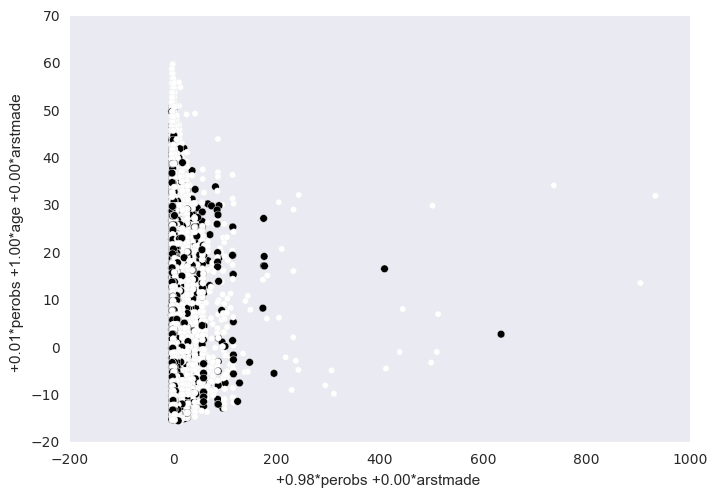

In [27]:
def get_feature_names_from_weights(weights, names):
    tmp_array = []
    for comp in weights:
        tmp_string = ''
        for fidx,f in enumerate(names):
            if fidx>0 and comp[fidx]>=0:
                tmp_string+='+'
                tmp_string += '%.2f*%s ' % (comp[fidx],f[:])
        tmp_array.append(tmp_string)
    return tmp_array
  
pca_weight_strings = get_feature_names_from_weights(pca.components_, X) 
lda_weight_strings = get_feature_names_from_weights(lda.scalings_.T, X) 

df_pca = pd.DataFrame(X_pca,columns=[pca_weight_strings])
df_lda = pd.DataFrame(X_lda,columns=[lda_weight_strings])

from pandas.tools.plotting import scatter_plot

ax = scatter_plot(df_pca, pca_weight_strings[1], pca_weight_strings[0], c=y, s=(y+2)*10)
newfig = plt.figure()

In the preceding plot we can see that PCA didn't do a good job because of the weak correlation between the data points.

Now let's start modeling!

Before that we will create new data frames X and Y as follows (This imporves the readability and understanding of the variables, having X and Y makes it clearer to understand our target class and identify the data features easily):

In [28]:
%pylab inline 
X=pd.DataFrame()
X['age']=df['age']
X['sex']=df['sex']
X['race']=df['race']
X['perobs']=df['perobs']
X['inout']=df['inout']
X['rf_attir']=df['rf_attir']
X['searched']=df['searched']
X['frisked']=df['frisked']
X['offunif']=df['offunif']
X['pistol']=df['pistol']
X['contrabn']=df['contrabn']
X['arstmade']=df['arstmade']

Populating the interactive namespace from numpy and matplotlib


C:\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [29]:
#dropping any missing values
X=X.dropna(axis=0)

In [30]:
#arrest made will be our dependent variable "y". we should assign it to y and remove it from X
y = X['arstmade']
X= X.drop(['arstmade'], axis=1)

In [31]:
#df3.dropna(axis=0) #handling missing values by dropping them

In [32]:
#created y which is the dependent variable we want to predict, y is the arstmade variable here 
y=y.replace(['Y', 'N'], [1, 0])

In [33]:
X=X.replace(['Y', 'N'], [1, 0])
X=X.replace(['I', 'O'], [1, 0]) #Converting the yes and no and in and out to numeric values of 1 and 0

Now we implement one hot encoding for sex and race:

In [34]:
X['sex']=pd.get_dummies(X.sex)

In [35]:
X['race']=pd.get_dummies(X.race)

In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 529477 entries, 0 to 529476
Data columns (total 11 columns):
age         529477 non-null int64
sex         529477 non-null float64
race        529477 non-null float64
perobs      529477 non-null int64
inout       529477 non-null int64
rf_attir    529477 non-null int64
searched    529477 non-null int64
frisked     529477 non-null int64
offunif     529477 non-null int64
pistol      529477 non-null int64
contrabn    529477 non-null int64
dtypes: float64(2), int64(9)
memory usage: 48.5 MB


We can see that all the features have been converted to integer and float values. This makes it easier for us to work with.

In [36]:
from sklearn.cross_validation import train_test_split #this is for our cross validation process 
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X=scaler.fit_transform(X) #scaling and standarization of our data 

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [37]:
#now we will build our training and test sets with  about 30% of our data will be used for testing the model 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

We choose the hold-out method because our dataset is large enough making the 30%-70% test split more suited to the hold-out method.

K-fold is computationally expensive for a dataset of our size compared to hold-out method.

Also, what is worth mentioning is, when we are modeling using support vector machines and multilayer perceptrons, we used a new *train_test_split* percentages as they took hours to execute with no results. Therefore, when we start with Linear and Non-linear SVMs and perform Multilayer perceptrons, we used *X_trainsvm*, *y_trainsvm*, *X_testsvm*, and *y_testsvm* instead of the above mentioned percentages.


-----

#### Performance Evaluation Metrics:

Accuracy is very deceiving when it comes to evaluating models, especially when you have a class imbalance problem. 
Therefore, we chose the following performance evaluation metrics:

1. Confusion Matrix: We used the confusion matrix to see the number of true positives and false positives as well as 
the false positives and false negatives in our classifiers.
2. Area Under the Curve: We used the value of the area under the ROC (Receiver Operating Characteristics) curve as an indication of how good our model is. This is a good way of evaluating the classifier since we  mostly care about the
true positives and false positives in our project. 
    * True Positive (TP) means that a person who is arrested we predicted that they should be arrested, this is good because it reduces the possibility of racial bias by the police and ensures that bad people are in jail.
    * Also, False Positives (FP) are very important since we care about not arresting people who don't deserve to be arrested! 
    * True Positive and False Positive rates are used and the calculated area under the curve is one of our main metrics. The higher the area under the curve the better. The closer to 1 (ideal ROC) is the better.
3. Cost Sensitive Measures: We also used Precision, Recall, F-1, and Support measures to evaluate our classifier models. 
    * Higher precision at the specific class means lower false positives which as we explained, is a very important indicator. 
    * Also, Recall is used to indicate how are our false negative predictions, where a higher recall means a lower false negative, which is good for our case. 
    * F1 is an indication of both, this means that a higher F1 means lower FP and FN which we care about in our classifiers. 
    * Support is the number of occurrences of each class in the actual data and we can use it to indicate how many times we predicted right.
4. Accuracy is not used as an actual performance evaluation metric. We just used it as an initial evaluation metric and compared it to the accuracy of our 'Base Rate Model' that predicted zero arrests were made on all people.

This Base Rate Model is explained below: 

To determine if the accuracy that we will get is good accuracy or not, we first have to build a 'base rate' model and observe its accuracy, then we build our model and check its accuracy. Only then can we check if our model is good or not.

In [38]:
#we will create a model that says all people who were stopped were NOT arrested 
def base_rate_model(X):
    y=np.zeros(X.shape[0])
    return y

In [39]:
#how accurate is this base rate model ?
y_base_rate=base_rate_model(X_test)
from sklearn.metrics import accuracy_score 
print(("base rate accuracy is %2.2f") % accuracy_score(y_test, y_base_rate))

base rate accuracy is 0.94


As we can see, the base rate model in this case is pretty accurate, this is because the arrests made (arstmade=1) constitute only a small portion of the total dataset for the arrest feature this also shows us that accuracy maybe is not the best metric.

## Logistic Regression

This will be our first classifier:

In [40]:
#let's see if we can beat this 94% 
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(class_weight='balanced', penalty='l2', dual=False, C=1) 

The hyperparameter tuning here is basically giving a balanced class weight since we suffer from class imbalance problem and specifying the penalty and setting the dual to false.

In [41]:
model.fit(X_train, y_train)

LogisticRegression(C=1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [42]:
from sklearn.metrics import confusion_matrix
print(("Overall Logistic Regression accuracy is %2.2f") % accuracy_score(y_test,model.predict(X_test)))

Overall Logistic Regression accuracy is 0.92


##### Very Important :
Before implementing any tuning we got a higher accuracy of 95% but it gave us around 0.62 AUC. 
Now, with this tuning and giving a class weight, we achieved an AUC of 0.82 ! 
**This is a significant improvement.**

Remember: Accuracy is not a good measure for how good a model is, especially when you have a class imbalance problem

So, the question is : How good is this model? 

To answer this, we can use a confusion matrix, cost matrix, CV, and AUC and ROC.

In [43]:
print(" -- Confusion Matrix for Logistic Regression Classifier -- \n ", confusion_matrix(y_test, model.predict(X_test)))

 -- Confusion Matrix for Logistic Regression Classifier -- 
  [[139506   9597]
 [  2887   6854]]


In [44]:
# Using the Area Under the Curve AUC metric 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import classification_report

In [45]:
print ("------ Base Rate Model ---- ")
base_roc_auc=roc_auc_score(y_test, base_rate_model(X_test))
print("Base Rate AUC =%2.2f"%base_roc_auc)
print(classification_report(y_test, base_rate_model(X_test)) )
print("\n\n ---- Logistic Regression Model --- ")
#logistic AUC
logit_roc_auc=roc_auc_score(y_test, model.predict(X_test))
print("Logistic AUC =%2.2f"%logit_roc_auc)
print(classification_report(y_test, model.predict(X_test)) )

------ Base Rate Model ---- 
Base Rate AUC =0.50
             precision    recall  f1-score   support

          0       0.94      1.00      0.97    149103
          1       0.00      0.00      0.00      9741

avg / total       0.88      0.94      0.91    158844



 ---- Logistic Regression Model --- 
Logistic AUC =0.82
             precision    recall  f1-score   support

          0       0.98      0.94      0.96    149103
          1       0.42      0.70      0.52      9741

avg / total       0.95      0.92      0.93    158844



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


AUC of 0.5 IS THE LOWEST AUC that you can possibly have ... it is saying that it is a completly random model.

AUC of 0.82 tells us that it is better than the base model.

Plotting the ROC curve for logistic regression classifier:

In [46]:
from sklearn.metrics import roc_curve 
fpr, tpr, thresholds=roc_curve(y_test, model.predict_proba(X_test)[:,1]) #implementing the false +ve and true +ve roc

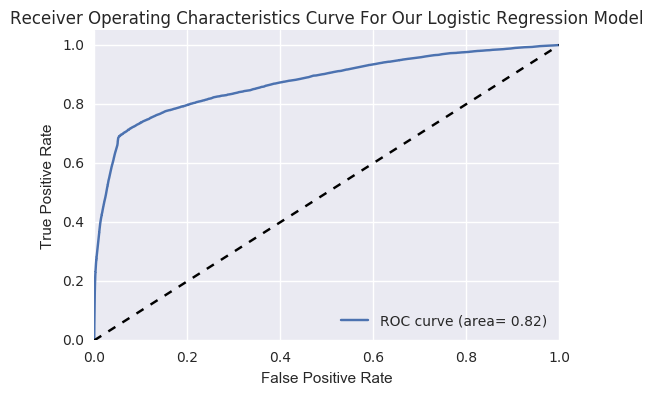

In [47]:
#we are here plotting the ROC curve for the arrest class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area= %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.05)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristics Curve For Our Logistic Regression Model")
plt.legend(loc="lower right")
plt.show()

Remember the more is the area under the curve the better is the classifier.

Perfect is 100% true positive and 0% false positive -- the ideal shape of the ROC curve.

##### -------------------------Classifier We Didn't Discuss in Class ------------
##### -------------------------Gradient Boosted Regression Trees (GBRT)----------


In [48]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
clfgbrt = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=1, random_state=0).fit(X_train, y_train)
clfgbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=0,
              subsample=1.0, verbose=0, warm_start=False)

In [49]:
print(("Overall GBRT accuracy is %2.2f") % accuracy_score(y_test,clfgbrt.predict(X_test)))
print(" -- Confusion Matrix for GBRT Classifier -- \n ", confusion_matrix(y_test, clfgbrt.predict(X_test)))
clfgbrt_roc_auc=roc_auc_score(y_test, clfgbrt.predict(X_test))
print("Logistic AUC =%2.2f"%clfgbrt_roc_auc)
print(classification_report(y_test, clfgbrt.predict(X_test)) )

Overall GBRT accuracy is 0.93
 -- Confusion Matrix for GBRT Classifier -- 
  [[141864   7239]
 [  3739   6002]]
Logistic AUC =0.78
             precision    recall  f1-score   support

          0       0.97      0.95      0.96    149103
          1       0.45      0.62      0.52      9741

avg / total       0.94      0.93      0.94    158844



As we can see, the Gradient Boosted Regression Tree classifier performs well according to our performance evaluation metrics that we are using (AUC, Recall, Precision, F1 and Support). 

Also, it is faster than other models (will see below).

It is true that its precision is a bit higher than logistic regression with "arrest made = 1" which means lower false positives compared to logistic regression, but, this improvement is very small compared to the higher recall of logistic regression at arrests made = 1. Lower false negatives are something that we care about too. 

A person who should be arrested and they are not arrested is considered as a danger to society. More analysis and conclusions at the end of this notebook. 

### Now let's use Support Vector Machines (SVM) to perform our classification 

In [50]:
#first we have to creat a different test-split ... since our dataset is huge 
X_trainsvm, X_testsvm, y_trainsvm, y_testsvm = train_test_split(X, y, test_size=0.9, random_state=0)

In [51]:
#First, using linear SVM. But before that, we used Randomized PCA on X 

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.decomposition import RandomizedPCA

n_components = 11
pca = RandomizedPCA(n_components=n_components)
Xpca = pca.fit_transform(X_trainsvm)

clf = LinearSVC(class_weight='balanced', max_iter=10000)
clf.fit(Xpca,y_trainsvm)

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=10000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [65]:
from sklearn.metrics import confusion_matrix
yhat = clf.predict(X_testsvm)
print('Linear SVM Overall Accuracy is ',accuracy_score(y_testsvm,yhat))

print(" -- Confusion Matrix for the Linear SVM ", confusion_matrix(y_testsvm, yhat))

Linear SVM Overall Accuracy is  0.820659769584
 -- Confusion Matrix for the Linear SVM  [[384884  62854]
 [ 22607   6185]]


In [66]:
#Since accuracy can be inaccurate especially when we have a case of class imbalance as it is the case here
#we should construct a AUC model and see if this linear SVM is truly capable of giving good prediction

print ("------ Base Rate Model ---- ")
base_roc_auc=roc_auc_score(y_testsvm, base_rate_model(X_testsvm))
print("Base Rate AUC =%2.2f"%base_roc_auc)
print(classification_report(y_testsvm, base_rate_model(X_testsvm)) )
print("\n\n ---- Linear SVM --- ")
#linear SVM AUC 
lsvm_roc_auc=roc_auc_score(y_testsvm, clf.predict(X_testsvm))
print("linear SVM =%2.2f"%lsvm_roc_auc)
print(classification_report(y_testsvm, clf.predict(X_testsvm)) )

------ Base Rate Model ---- 
Base Rate AUC =0.50


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.94      1.00      0.97    447738
          1       0.00      0.00      0.00     28792

avg / total       0.88      0.94      0.91    476530



 ---- Linear SVM --- 
linear SVM =0.54
             precision    recall  f1-score   support

          0       0.94      0.86      0.90    447738
          1       0.09      0.21      0.13     28792

avg / total       0.89      0.82      0.85    476530



**This is an important result indicating that using linear SVM is not a good classification algorithm on our dataset!**

#-------- Tuning Hyperparameters for Linear SVM --------#


Now, let's try and do some tuning for the hyperparameters in our Linear SVM classification method.

We will tune the class weights here to be class_weight=balanced and change the dual to be false.

We will also train it more and give it a larger  number of iterations.

Now let's see what happens

In [52]:
clf = LinearSVC(class_weight='balanced', max_iter=100000, dual=False)
clf.fit(Xpca,y_trainsvm)

LinearSVC(C=1.0, class_weight='balanced', dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=100000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [53]:
#and now let's see its accuracy and its performance 

yhat = clf.predict(X_testsvm)
print('Overall Accuracy is ',accuracy_score(y_testsvm,yhat))

print(" -- Confusion Matrix for the Linear SVM ", confusion_matrix(y_testsvm, yhat))

Overall Accuracy is  0.820380668583
 -- Confusion Matrix for the Linear SVM  [[384874  62864]
 [ 22730   6062]]


In [54]:
lsvm_roc_auc=roc_auc_score(y_testsvm, clf.predict(X_testsvm))
print("linear SVM AUC =%2.2f"%lsvm_roc_auc)
print(classification_report(y_testsvm, clf.predict(X_testsvm)))

linear SVM AUC =0.54
             precision    recall  f1-score   support

          0       0.94      0.86      0.90    447738
          1       0.09      0.21      0.12     28792

avg / total       0.89      0.82      0.85    476530



As we can see, tuning the hyperparameters this way for linear SVM didn't help much in improving the prediction performance. This is mostly indicating that our dataset is highly nonlinear. We will see below how non-linear SVMs give superior prediction performance compared to Linear SVM.

**NON LINEAR SVMs**


* RBF: we can use the following nonlinear SVM techniques and see if one is better than the other in the prediction
first thing we will do is look at their accuracies before implementing any tuning we got an AUC=0.7 with RBF, let's see if we get any better results after we give a class weight and assign gamma to be auto

P.S It takes a while :)

In [74]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
clf = SVC(kernel='rbf', class_weight='balanced', gamma='auto')
clf.fit(X_trainsvm,y_trainsvm)
yhat = clf.predict(X_testsvm)
print('Overall Accuracy with RBF is ',accuracy_score(y_testsvm,yhat))

Overall Accuracy with RBF is  0.914825929113


In [75]:
#as we can see here ,RBF gave better accuracy than linear svm.
#But, is it really better? we should investigate its AUC and ROC
#and compare it to the base rate model 

print("\n\n ---- RBF--- ")
#Non Linear SVM - RBF 
rbf_roc_auc=roc_auc_score(y_testsvm, clf.predict(X_testsvm))
print("RBF SVM =%2.2f"%rbf_roc_auc)
print(classification_report(y_testsvm, clf.predict(X_testsvm)) )



 ---- RBF--- 
RBF SVM =0.82
             precision    recall  f1-score   support

          0       0.98      0.93      0.95    447738
          1       0.39      0.70      0.50     28792

avg / total       0.94      0.91      0.93    476530



After tuning the hyperparameters we can see a significant increase in the RBF performance by the ROC AUC=0.82 !

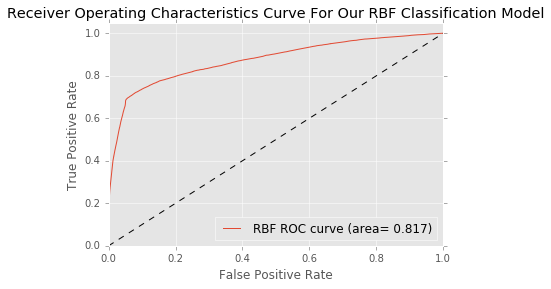

In [148]:
# ROC for our RBF Classification
#we are here plotting the ROC curve for the arrest class using RBF 

plt.figure()
plt.plot(fpr, tpr, label='RBF ROC curve (area= %0.3f)' % rbf_roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.05)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristics Curve For Our RBF Classification Model")
plt.legend(loc="lower right")
plt.show()

* **SIGMOID** 

    With Sigmoid, before tuning . ROC AUC = 0.67 

    After tuning .. we have a ROC AUC = 0.71

In [79]:
clfsig = SVC(kernel='sigmoid', class_weight='balanced', gamma='auto')
clfsig.fit(X_trainsvm,y_trainsvm)
yhatsig = clfsig.predict(X_testsvm)
print('Overall Accuracy with Sigmoid is ',accuracy_score(y_testsvm,yhatsig))

Overall Accuracy with Sigmoid is  0.717532998972


In [80]:
print("\n\n ---- Sigmoid-- ")

#Non Linear SVM - Sigmoid
sig_roc_auc=roc_auc_score(y_testsvm, clfsig.predict(X_testsvm))
print("Sigmoid SVM =%2.2f"%sig_roc_auc)
print(classification_report(y_testsvm, clfsig.predict(X_testsvm)) ) 



 ---- Sigmoid-- 
Sigmoid SVM =0.71
             precision    recall  f1-score   support

          0       0.97      0.72      0.83    447738
          1       0.14      0.71      0.23     28792

avg / total       0.92      0.72      0.79    476530



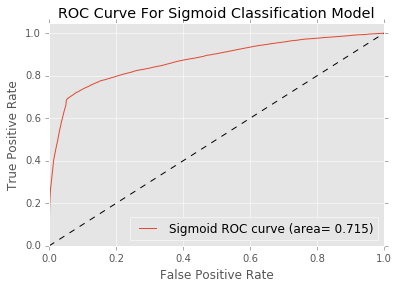

In [81]:
#plotting the ROC curve for the Sigmoid 

plt.figure()
plt.plot(fpr, tpr, label='Sigmoid ROC curve (area= %0.3f)' % sig_roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.05)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve For Sigmoid Classification Model")
plt.legend(loc="lower right")
plt.show()

* Polynomial SVM  
    Note : It takes ~50mins to execute!

In [58]:
clfpoly = SVC(kernel='poly', class_weight='balanced', gamma='auto')
clfpoly.fit(X_trainsvm,y_trainsvm)
yhatpoly = clfpoly.predict(X_testsvm)
print('Overall Accuracy with poly is ',accuracy_score(y_testsvm,yhatpoly))

Overall Accuracy with poly is  0.913908882966


In [60]:
print("\n\n ---- Polynomial SVM --- ")

#Non Linear SVM - Poly
poly_roc_auc=roc_auc_score(y_testsvm, clfpoly.predict(X_testsvm))
print("Poly SVM AUC=%2.2f"%poly_roc_auc)
print(classification_report(y_testsvm, clfpoly.predict(X_testsvm)) ) 



 ---- Polynomial SVM --- 
Poly SVM AUC=0.81
             precision    recall  f1-score   support

          0       0.98      0.93      0.95    447738
          1       0.38      0.70      0.49     28792

avg / total       0.94      0.91      0.93    476530



It took more time to execute 
Before any tuning, ROC AUC = 0.67 
after tuning, ROC AUC = 0.81 
Significant improvement after tuning

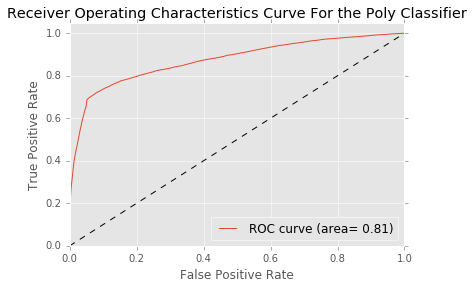

In [61]:
#plotting the ROC curve for the Poly SVM  
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area= %0.2f)' % poly_roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.05)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristics Curve For the Poly Classifier")
plt.legend(loc="lower right")
plt.show()

All three non linear SVMs gave similar results when it comes to ROC and area ander the ROC curve.

Note that we significantly improved the classifier's performance only after we did some tuning for the hyper-parameters.We emphasized on class weights and the gamma value, this resulted in a AUC increase from 0.67 to 0.81.

Another factor should be taken into consideration when choosing an algorithm is the computational complexity and the time it takes to execute. The non-linear SVMs take too much time to execute as the number of features and instances increase, and this is seen in the above models. We will provide an analysis statement at the end of this notebook.


## Multilayer Perceptron

Now, let's Implement and tune the hyperparameters of the Multilayer Perceptron Classifier and see its performance.

MLP CLASSIFIER

In [54]:
from sklearn import __version__ as sklearn_version
print(sklearn_version)

0.18


In [84]:
from sklearn.neural_network import MLPClassifier

#we will use the Stochastic Gradient Descent (SGD) and the Logistic Activation Function
#note: we used the X_trainsvm, Y_trainsvm, and the X_testsvm and Y_testsvm only because it takes a reasonable amount of 
#time if we want to train 80% and test on 20%, instead, we train on 10% of the data and test on the remaining 90%

clfmlp = MLPClassifier(hidden_layer_sizes=(50, ), 
                    activation='logistic', 
                    solver='sgd', 
                    alpha=1e-4, # L2 penalty
                    batch_size='auto', 
                    learning_rate='constant', 
                    learning_rate_init=0.1, 
                    power_t=0.5,    
                    max_iter=100, 
                    shuffle=True, 
                    random_state=1, 
                    tol=1e-9, 
                    verbose=False, 
                    warm_start=False, 
                    momentum=0.9, 
                    nesterovs_momentum=True, 
                    early_stopping=False, 
                    validation_fraction=0.1, 
                    beta_1=0.9, 
                    beta_2=0.999, 
                    epsilon=1e-08) 
clfmlp.fit(X_trainsvm,y_trainsvm)
yhatmlp = clfmlp.predict(X_testsvm)
print('Overall Accuracy with poly is ',accuracy_score(y_testsvm,yhatmlp))

Overall Accuracy with poly is  0.953335571737


It converged much faster the non linear svm.


Let's see if it gives better performance by looking at the classification report and investigating its ROC and AUC: 

In [86]:
print("\n\n ---- Multilayer Perceptron--- ")
#MLP Classifier
mlp_roc_auc=roc_auc_score(y_testsvm, clfmlp.predict(X_testsvm))
print("MLP AUC=%2.2f"%mlp_roc_auc)
print(classification_report(y_testsvm, clfmlp.predict(X_testsvm)) ) 



 ---- Multilayer Perceptron--- 
MLP AUC=0.66
             precision    recall  f1-score   support

          0       0.96      0.99      0.98    447738
          1       0.77      0.32      0.46     28792

avg / total       0.95      0.95      0.94    476530



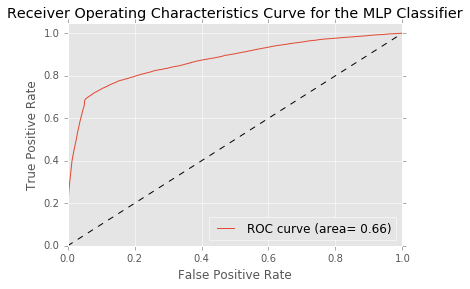

In [88]:
#plotting the ROC curve for the MLP Classifier 
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area= %0.2f)' % mlp_roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.05)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristics Curve for the MLP Classifier")
plt.legend(loc="lower right")
plt.show()

This was with 50 hidden neurons, so, can we improve the performance if we increase them to 100 hidden neurons and use a constant learning rate:

In [90]:
clfmlp = MLPClassifier(hidden_layer_sizes=(100, ), 
                    activation='logistic', 
                    solver='sgd', 
                    alpha=1e-4, 
                    batch_size='auto', 
                    learning_rate='constant', 
                    learning_rate_init=0.1, 
                    power_t=0.5,    
                    max_iter=100, 
                    shuffle=True, 
                    random_state=1, 
                    tol=1e-9, 
                    verbose=False, 
                    warm_start=False, 
                    momentum=0.9, 
                    nesterovs_momentum=True, 
                    early_stopping=False, 
                    validation_fraction=0.1, 
                    beta_1=0.9, 
                    beta_2=0.999, 
                    epsilon=1e-08) 
clfmlp.fit(X_trainsvm,y_trainsvm)
yhatmlp = clfmlp.predict(X_testsvm)
print('Overall Accuracy with poly is ',accuracy_score(y_testsvm,yhatmlp))

Overall Accuracy with poly is  0.952183493169


In [91]:
print("\n\n ---- Multilayer Perceptron with 100 hidden layers--- ")
#MLP Classifier
mlp_roc_auc=roc_auc_score(y_testsvm, clfmlp.predict(X_testsvm))
print("MLP AUC=%2.2f"%mlp_roc_auc)
print(classification_report(y_testsvm, clfmlp.predict(X_testsvm)) ) 



 ---- Multilayer Perceptron with 100 hidden layers--- 
MLP AUC=0.67
             precision    recall  f1-score   support

          0       0.96      0.99      0.97    447738
          1       0.71      0.35      0.47     28792

avg / total       0.94      0.95      0.94    476530



As we can see it didn't improve much, only by 0.01 

# ENSEMBLE METHOD
Here, we chose the logistic Regression, RBF, and MLP in our ensemble.

We will use the Bagging method in our ensemble classifier.

We will average the prediction capability of the 3 above mentioned classifiers.

We chose Logistic regression because it gave very good performance with a short processing time.

We chose RBF because it gave superior performance compared to linear SVM and Non-linear Sigmoid and it executed in 
a shorter time compared to the non-linear Poly kernel.

We chose the Multilayer perceptron because it gave this "Good" performance (we consider AUC of 0.67 to be good) in a very.

Short time compared to all other non-linear SVM techniques.

In [123]:
#Bagging : logistic Regression as a base classifier  
from sklearn.ensemble import BaggingClassifier
bagginglogist = BaggingClassifier(model,
                            n_estimators=10,
                           max_samples=0.2, max_features=1)
bagginglogist.fit(X_trainsvm,y_trainsvm)
yhatblogist = bagginglogist.predict(X_testsvm)
print('Accuracy with Logistic Regression Bagging  is ',accuracy_score(y_testsvm,yhatblogist))
print("The mean score and the 95 percent confidence interval:")
print( "Accuracy: %0.2f (+/- %0.2f)" % (accuracy_score(y_testsvm,yhatblogist).mean(), accuracy_score(y_testsvm,yhatblogist).std() * 2))

Accuracy with Logistic Regression Bagging  is  0.931177470464
The mean score and the 95 percent confidence interval:
Accuracy: 0.93 (+/- 0.00)


In [124]:
print(" -- Confusion Matrix for the Logistic Regression Bagging method", confusion_matrix(y_testsvm, yhatblogist))

 -- Confusion Matrix for the Logistic Regression Bagging method [[425603  22135]
 [ 10661  18131]]


In [125]:
print("\n\n ---- Logistic Regression Base Estimators -- Bagging Method--- ")
blogist_roc_auc=roc_auc_score(y_testsvm, bagginglogist.predict(X_testsvm))
print("Bagging Logistic Regression AUC=%2.2f"%blogist_roc_auc)
print(classification_report(y_testsvm, bagginglogist.predict(X_testsvm)) ) 



 ---- Logistic Regression Base Estimators -- Bagging Method--- 
Bagging Logistic Regression AUC=0.79
             precision    recall  f1-score   support

          0       0.98      0.95      0.96    447738
          1       0.45      0.63      0.53     28792

avg / total       0.94      0.93      0.94    476530



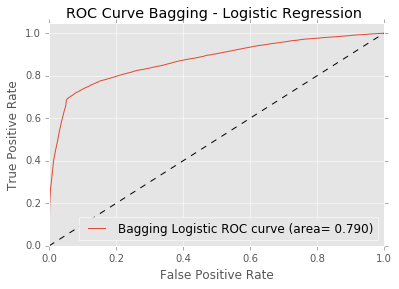

In [126]:
plt.figure()
plt.plot(fpr, tpr, label='Bagging Logistic ROC curve (area= %0.3f)' % blogist_roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.05)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Bagging - Logistic Regression ")
plt.legend(loc="lower right")
plt.show()

NOTE: No improvement over the logistic regression classifier 
Seems like reducing the variance by the bagging method is not sufficient enough to increase the AUC 

### Using the Multilayer Perceptron as a base estimator in the Bagging Method

In [141]:
baggingmlp = BaggingClassifier(clfmlp,
                            n_estimators=10,
                           max_samples=0.5, max_features=1)
baggingmlp.fit(X_trainsvm,y_trainsvm)
yhatbmlp = baggingmlp.predict(X_testsvm)
print('Accuracy with MLP Bagging is ',accuracy_score(y_testsvm,yhatbmlp))
print("The mean score and the 95 percent confidence interval:")
print( "Accuracy: %0.2f (+/- %0.2f)" % (accuracy_score(y_testsvm,yhatbmlp).mean(), accuracy_score(y_testsvm,yhatbmlp).std() * 2))



Accuracy with MLP Bagging is  0.939579879546
The mean score and the 95 percent confidence interval:
Accuracy: 0.94 (+/- 0.00)


In [142]:
print(" -- Confusion Matrix for the MLP Bagging method \n", confusion_matrix(y_testsvm, yhatbmlp))

 -- Confusion Matrix for the MLP Bagging method 
 [[447738      0]
 [ 28792      0]]


In [143]:
print("\n\n ---- MLP Base Estimator-- Bagging Method--- ")
bmlp_roc_auc=roc_auc_score(y_testsvm, baggingmlp.predict(X_testsvm))
print("Bagging MLP AUC=%2.2f"%bmlp_roc_auc)
print(classification_report(y_testsvm, baggingmlp.predict(X_testsvm)) ) 



 ---- MLP Base Estimator-- Bagging Method--- 
Bagging MLP AUC=0.50
             precision    recall  f1-score   support

          0       0.94      1.00      0.97    447738
          1       0.00      0.00      0.00     28792

avg / total       0.88      0.94      0.91    476530



C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Since Bagging method reduces the variance by introducing randomization into its construction procedure, we can see that using MLP as a base estimator results in very poor performance when it comes to arrests made.


This is because we have a few number of arrests made that weren't present as much in the subsets chosen this can be seen with the 0 in the TP in the confusion matrix and the 0 in the FP.

No arrests are the dominant in this model and they resulted in bad perforamnce in our model. In brief: The predictor couldn't see when arrests made.

### Using the RBF as a base estimator in the Bagging Method

In [144]:
baggingrbf = BaggingClassifier(clf,
                            n_estimators=10,
                           max_samples=0.2, max_features=1)
baggingrbf.fit(X_trainsvm,y_trainsvm)
yhatbrbf = baggingrbf.predict(X_testsvm)
print('Accuracy with RBF  Bagging is ',accuracy_score(y_testsvm,yhatbrbf))
print("The mean score and the 95 percent confidence interval:")
print( "Accuracy: %0.2f (+/- %0.2f)" % (accuracy_score(y_testsvm,yhatbrbf).mean(), accuracy_score(y_testsvm,yhatbrbf).std() * 2))

Accuracy with RBF  Bagging is  0.945216460664
The mean score and the 95 percent confidence interval:
Accuracy: 0.95 (+/- 0.00)


In [145]:
print(" -- Confusion Matrix for the RBF Bagging method \n", confusion_matrix(y_testsvm, yhatbrbf))

 -- Confusion Matrix for the RBF Bagging method 
 [[447472    266]
 [ 25840   2952]]


In [146]:
print("\n\n ---- RBF Base Estimator-- Bagging Method--- ")
baggingrbf_roc_auc=roc_auc_score(y_testsvm, baggingrbf.predict(X_testsvm))
print("Bagging RBF AUC=%2.2f"%baggingrbf_roc_auc)
print(classification_report(y_testsvm, baggingrbf.predict(X_testsvm)) )  #note: it takes too much time! 



 ---- RBF Base Estimator-- Bagging Method--- 
Bagging RBF AUC=0.55
             precision    recall  f1-score   support

          0       0.95      1.00      0.97    447738
          1       0.92      0.10      0.18     28792

avg / total       0.94      0.95      0.92    476530



It is clear that using the Bagging method ensemble is not recommended for such dataset.

RBF and MLP gave better performance when they were used individually and not as a base estimator for the Bagging method.


## Analysis and Recommendations
1. **Logistic Regression**: It performed very well especially after tuning its hyperparameters (auc of 0.82) and its performance in predicting the classes was shown in the confusion matrix and the ROC curve. We care mostly about true positives and false positives since our main goal was to use a model that gives better prediction in whether a person  should be arrested or not.True positive means we did well in arresting someone who should be arrested and false positive means we are arresting someone who doesn't deserve to be arrested. Logistic Regression performed well according to our performance metrics which are: 
    * Confusion Matrix, ROC, AUC, and Cost Sensitive Measures (e.g. Recall, Precision, and F1  and support)
2. **Linear SVMs**: According to our results, we don't recommend using Linear SVMs to do prediction on the stop and frisk dataset because it gave a performance that was almost like our base rate model which predicted  that no one is arrested this poor performance was seen in all of our performance evaluation metrics (mentioned above)

3. **Non-linear Support Vector Machines**: All 3 kernels used in our non-linear SVM classifiers gave good results. With RBF and Poly having an AUC of 0.82 and 0.81 and the Sigmoid of AuC of 0.71, we can safely assume that using any of these 3 classifiers would result in acceptable prediction. However, taking into account the time it takes to execute any of these 3 classifiers, we don't recommend using them on a normal PC/laptop. They take too much time to execute ( > 30 ~ 40 minutes). But, if they are to be used on high performance computers, using them would definitely result in good prediction of arrests and certainly would achieve our goal in providing an algorithm that can perform predictions on arrests.

4. **Neural Networks and MLP**: Multilayer perceptron was very fast compared to all non-linear SVMs and gave an AUC ROC of 0.67 with 100 hidden neurons which we believe is a good result and maybe can be improved with higher number of hidden neurons and/or more tuning of its hyperparameters. The averages of all cost sensitive measures were also very good and they serve our purpose of predicting arrests and avoiding false arrests! Therefore, we recommend using this MLP classifier for predicting arrests and making better judgements and unbiased decisions when it comes to making arrests to random people. 

Finally, we believe that any of these 3 models (Logistic Regression, RBF Classifier, and MLP) can be used by the interested organization to help in reducing bias among their staff and make better decisions in making good arrests.


Also, what is worth mentioning here is that our model is based only on a small number of features compared to the actual collected features by NYPD. Therefore, we would like to suggest implementing these models on high performance computers that take into consideration most of the features and then decide which one of these models would be the best in predicting arrests.


We can safely say to NYPD and any interested organization that these 3 mentioned models are good in predicting arrests according to our performance metrics and the features we used, BUT, we would like to recommend testing these algorithms on all features in NYPD's dataset and then, and only then, we can say that this model would give you very good predictions.


## Additional/Exceptional Analysis

Instead of using the Bagging method in our Ensemble, which proved to be not a good technique of improving our prediction capability on this dataset, we would like to see if another Esnemble method would result in better performance.

We will use the Adaboost classifier to try and see if it can give better performance in our prediction mission. 

We will use sklearn's Adaptive Boosting "adaboost" default base estimator, which is a *Decision Tree Classifier* and see if it can give a better performance than the previously used ones. As we know, AdaBoost will take the output of weak learners (decision tree in this case) and then combine them into a weighted sum that represents the final output of the boosted classifier.

In [154]:
from sklearn.ensemble import AdaBoostClassifier
clfada = AdaBoostClassifier(n_estimators=100)
clfada.fit(X_trainsvm,y_trainsvm)
yhatada = clfada.predict(X_testsvm)
print('Accuracy with Adaboost is ',accuracy_score(y_testsvm,yhatada))
print("The mean score and the 95 percent confidence interval:")
print( "Accuracy: %0.2f (+/- %0.2f)" % (accuracy_score(y_testsvm,yhatada).mean(), accuracy_score(y_testsvm,yhatada).std() * 2))

Accuracy with Adaboost is  0.951182506873
The mean score and the 95 percent confidence interval:
Accuracy: 0.95 (+/- 0.00)


In [155]:
print(" -- Confusion Matrix for the Adaboost Classifier  \n", confusion_matrix(y_testsvm, yhatada))
print("------------------------------------------------------")
print("\n\n ------Adaboost Classifier AUC and Classification Report--- ")
clfada_roc_auc=roc_auc_score(y_testsvm, clfada.predict(X_testsvm))
print("Adaboost AUC=%2.2f"%clfada_roc_auc)
print(classification_report(y_testsvm, clfada.predict(X_testsvm)) )

 -- Confusion Matrix for the Adaboost Classifier  
 [[445077   2661]
 [ 20602   8190]]
------------------------------------------------------


 ------Adaboost Classifier AUC and Classification Report--- 
Adaboost AUC=0.64
             precision    recall  f1-score   support

          0       0.96      0.99      0.97    447738
          1       0.75      0.28      0.41     28792

avg / total       0.94      0.95      0.94    476530



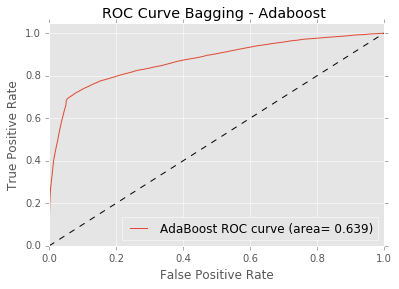

In [162]:
plt.figure()
plt.plot(fpr, tpr, label='AdaBoost ROC curve (area= %0.3f)' % clfada_roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.05)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Adaboost ")
plt.legend(loc="lower right")
plt.show()

As we can see, using the Adaboost classifier and the Decision Tree Classifier as its weak algorithm is a good technique to perform classification and prediction of arrests. 

This is shown by its confusion matrix, precision, recall and F1 and support, and its area under the curve (0.64) it was also fast compared to the other nonlinear SVM classifiers which is a major advantage for someone who is interersted in computational complexity when having very highly dimensional dataset.

#### Idea for better prediction capability:
Since we used only 11 features that we believed are important in our classification, we suggest that the interested 
organization (NYPD or any other organization) should test the above recommended algorithms on a dataset with higher dimensionality. Since we have limited resources and capabilities in our computers, we recommend using a combination of 
features using "OR" gate to combine certain features in one column. For example: a generic feature of "object found" that combines different kinds of weapons and illegal drugs in one column, or, a combined feature of all kinds of police force being used by the police. We believe that combining and taking all these features (~120 features) will result in better prediction capability by the classifier. 

* df_11: THE FOLLOWING OBJECTS FOUND FEATURES COMBINED
    * **contrabin**: WAS CONTRABAND FOUND ON SUSPECT ?
    * **pistol**: WAS A PISTOL FOUND ON SUSPECT ?
    * riflshot: WAS A RIFLE FOUND ON SUSPECT ?
* df_10: ALL POLICE FORCE FEATURES COMBINED
    * pf_hands: PHYSICAL FORCE USED BY OFFICER - HANDS
    * pf_wall: PHYSICAL FORCE USED BY OFFICER - SUSPECT AGAINST WALL
    * pf_grnd: PHYSICAL FORCE USED BY OFFICER - SUSPECT ON GROUND
    * pf_drwep: PHYSICAL FORCE USED BY OFFICER - WEAPON DRAWN
    * pf_twep: PHYSICAL FORCE USED BY OFFICER - WEAPON POINTED
    * pf_baton: PHYSICAL FORCE USED BY OFFICER - BATON
    * pf_hcuff: PHYSICAL FORCE USED BY OFFICER - HANDCUFFS
    * pf_pepsp: PHYSICAL FORCE USED BY OFFICER - PEPPER SPRAY
    * pf_other: PHYSICAL FORCE USED BY OFFICER - OTHER
* df_12: THE FOLLOWING VIOLENT CRIME FEATURES COMBINED
    * rf_vcrim: REASON FOR FRISK - VIOLENT CRIME SUSPECTED
    * rf_vcact: REASON FOR FRISK-  ACTIONS OF ENGAGING IN A VIOLENT CRIME
* df_14: THE FOLLOWING RELATED FEATURES COMBINED
    * rf_othsw: REASON FOR FRISK - OTHER SUSPICION OF WEAPONS
    * cs_objcs: REASON FOR STOP - CARRYING SUSPICIOUS OBJECT
* df_13: THE FOLLOWING IMPROPER ATTIRE FEATURES COMBINED
    * rf_attir: REASON FOR FRISK - INAPPROPRIATE ATTIRE FOR SEASON
    * cs_cloth: REASON FOR STOP - WEARING CLOTHES COMMONLY USED IN A CRIME    
    
### Code for implementing the combining 

In [55]:
# All police force from dataset is combined
# df_10=df[['pf_hands','pf_wall','pf_grnd','pf_drwep','pf_ptwep','pf_baton','pf_hcuff','pf_pepsp','pf_other']]
# df_10=df_10.replace(['Y', 'N'], [1,''])
# df_10['pf'] = df_10[['pf_hands','pf_wall','pf_grnd','pf_drwep','pf_ptwep','pf_baton','pf_hcuff','pf_pepsp','pf_other']].apply(lambda x : '{}{}{}{}{}{}{}{}'.format(x[0],x[1],x[2],x[3],x[4],x[5],x[6],x[7],x[8]), axis=1)
# df_10 = df_10.replace(['1','11','111','1111','11111',''],[1,1,1,1,1,0])
# df.insert(86,'pf',df_10['pf'])
# df.drop(df[['pf_hands','pf_wall','pf_grnd','pf_drwep','pf_ptwep','pf_baton','pf_hcuff','pf_pepsp','pf_other']], axis=1, inplace=True)

# All weapon from dataset is combined
# df_11=df[['contrabn','pistol','riflshot','machgun','othrweap']]
# df_11=df_11.replace(['Y', 'N'], [1,''])
# df_11['weapon'] = df_11[['contrabn','pistol','riflshot','machgun','othrweap']].apply(lambda x : '{}{}{}{}{}'.format(x[0],x[1],x[2],x[3],x[4]), axis=1)
# df_11 = df_11.replace(['1','11','111','1111','11111',''],[1,1,1,1,1,0])
# df.insert(86,'weapon',df_11['weapon'])
# df.drop(df[['contrabn','pistol','riflshot','machgun','othrweap']], axis=1, inplace=True)

# All Frisk Violence Crime Suspect from dataset is combined
# df_12=df[['rf_vcrim','rf_vcact']]
# df_12=df_12.replace(['Y', 'N'], [1,''])
# df_12['FriskViolence'] = df_12[['rf_vcrim','rf_vcact']].apply(lambda x : '{}{}'.format(x[0],x[1]), axis=1)
# df_12 = df_12.replace(['1','11','111','1111','11111',''],[1,1,1,1,1,0])
# df.insert(86,'FriskViolence',df_12['FriskViolence'])
# df.drop(df[['rf_vcrim','rf_vcact']], axis=1, inplace=True)

# All Improper attire from dataset is combined
# df_13=df[['rf_attir','cs_cloth']]
# df_13=df_13.replace(['Y', 'N'], [1,''])
# df_13['CrimeAttire'] = df_13[['rf_attir','cs_cloth']].apply(lambda x : '{}{}'.format(x[0],x[1]), axis=1)
# df_13 = df_13.replace(['1','11','111','1111','11111',''],[1,1,1,1,1,0])
# df.insert(86,'CrimeAttire',df_13['CrimeAttire'])
# df.drop(df[['rf_attir','cs_cloth']], axis=1, inplace=True)

# All Frisk Violence Weapon from dataset is combined
# df_14=df[['rf_othsw','cs_objcs']]
# df_14=df_14.replace(['Y', 'N'], [1,''])
# df_14['WeaponViolence'] = df_14[['rf_othsw','cs_objcs']].apply(lambda x : '{}{}'.format(x[0],x[1]), axis=1)
# df_14 = df_14.replace(['1','11','111','1111','11111',''],[1,1,1,1,1,0])
# df.insert(86,'WeaponViolence',df_14['WeaponViolence'])
# df.drop(df[['rf_othsw','cs_objcs']], axis=1, inplace=True)

# Dropping non-required columns from dataset
# df.drop(df[['year','ser_num','datestop','inout','crimsusp']], axis=1, inplace=True)
# df.drop(df[['explnstp','othpers','arstoffn','sumissue','sumoffen','compyear','comppct']], axis=1, inplace=True)
# df.drop(df[['adtlrept','asltweap','knifcuti','ac_rept','ac_inves','ac_proxm','cs_casng','cs_lkout']], axis=1, inplace=True)
# df.drop(df[['ac_evasv','ac_assoc','cs_furtv','rf_rfcmp','ac_cgdir','rf_verbl']], axis=1, inplace=True)
# df.drop(df[['cs_vcrim','cs_bulge','cs_other','ac_time','rf_knowl','ac_stsnd','ac_other']], axis=1, inplace=True)
# df.drop(df[['sb_hdobj','sb_outln','sb_admis','sb_other','repcmd','revcmd','rf_furt','rf_bulg','offverb']], axis=1, inplace=True)
# df.drop(df[['offshld','forceuse','dob','ht_feet','ht_inch','weight','haircolr','eyecolor','build','addrtyp','rescode']], axis=1, inplace=True)
# df.drop(df[['premtype','premname','addrnum','stname','stinter','crossst','aptnum','city','state','zip','addrpct','sector','beat','post','xcoord','ycoord','dettypcm','linecm']], axis=1, inplace=True)